In [25]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier,plot_tree
import sklearn as skl
import matplotlib.pyplot as plt

In [26]:
pizzadf  = pd.read_csv('Sample-Survey.csv', header=0) 

In [27]:
import sklearn as skl
# Decision Tree Classifier
# Create a decision tree classifier object using entropy
# Specify a tree depth of 3
dtree = skl.tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
#Explore the dataset
pizzadf.head()
pizzadf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 1 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   T: ham, pineapple, mushroom, pepperoni, chicken, extra cheese, BBQ sauce, good pizza;  120 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [29]:
#separate features and target variable
x = pizzadf.iloc[:, :-1] #features
y = pizzadf.iloc[:, -1] #target variable


print(pizzadf.columns)
x = pizzadf['T: ham, pineapple, mushroom, pepperoni, chicken, extra cheese, BBQ sauce, good pizza;'].str.split(', ', expand=True)

# Check the first few rows of the new 'x' DataFrame
print(x.head())



Index(['T: ham, pineapple, mushroom, pepperoni, chicken, extra cheese, BBQ sauce, good pizza;'], dtype='object')
      0  1  2  3  4  5  6   7
0  A: 0  0  0  0  0  0  1  1;
1  A: 1  0  0  1  0  0  1  1;
2  A: 1  0  0  1  0  0  1  1;
3  A: 0  0  1  0  1  0  0  0;
4  A: 1  0  1  0  1  0  1  0;


In [30]:
#split the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [31]:
# Check data types of X_train and y_train
print(type(x_train))  # Check the type of X_train
print(type(y_train))  # Check the type of y_train
print(x_train.shape)  # Check the shape of X_train (rows, columns)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(84, 8)


In [32]:
print(x.head())  # Display the first few rows of x
print(x.shape)   # Display the shape of x



      0  1  2  3  4  5  6   7
0  A: 0  0  0  0  0  0  1  1;
1  A: 1  0  0  1  0  0  1  1;
2  A: 1  0  0  1  0  0  1  1;
3  A: 0  0  1  0  1  0  0  0;
4  A: 1  0  1  0  1  0  1  0;
(120, 8)


In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in x_train and x_test
for column in x_train.columns:
    # Fit the LabelEncoder on the combined dataset
    label_encoder.fit(pd.concat([x_train[column], x_test[column]], axis=0))
    
    # Transform the values in x_train and x_test
    x_train[column] = label_encoder.transform(x_train[column])
    x_test[column] = label_encoder.transform(x_test[column])


In [34]:
from sklearn.metrics import accuracy_score

# Fit the model
dtree.fit(x_train, y_train)

# Make predictions on the test set
predictions = dtree.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.08333333333333333


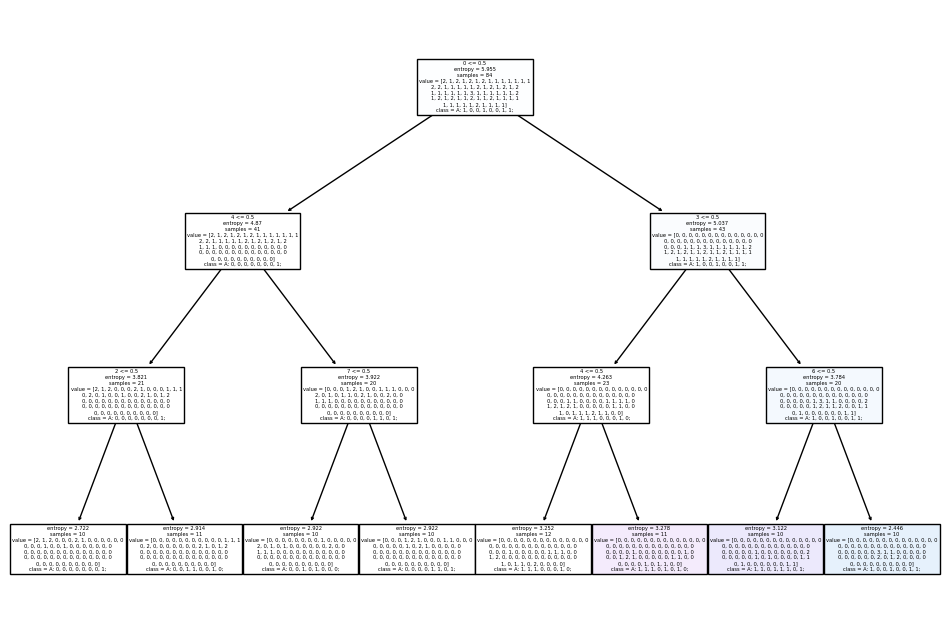

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dtree, filled=True, feature_names=x.columns, class_names=dtree.classes_)
plt.show()


In [36]:
from sklearn.metrics import accuracy_score

# Assuming `dtree` is your trained model and `X_test` and `y_test` are your test data and labels
predictions = dtree.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

# The number of errors is then the number of test instances minus the number of correct predictions
num_errors = len(y_test) - accuracy * len(y_test)
print("Number of errors: {:.0f}/{:d}".format(num_errors, len(y_test)))


Number of errors: 33/36


In [37]:
# This will give you a boolean array where True indicates a correct prediction and False an incorrect one
correct_predictions = predictions == y_test

# You can then use this to index into your test set and find the instances where your model made an error
errors = x_test[~correct_predictions]

In [38]:

# Print the instances where the model made an error
print(errors)

# If you want to see the incorrect predictions alongside the actual labels, you can do:
incorrect_predictions = predictions[~correct_predictions]
print("Incorrect predictions:", incorrect_predictions)

actual_labels = y_test[~correct_predictions]
print("Actual labels:", actual_labels)

     0  1  2  3  4  5  6  7
44   1  1  1  1  0  0  1  0
47   1  0  1  1  0  0  1  0
4    1  0  1  0  1  0  1  0
55   0  1  1  0  0  1  0  0
64   1  0  1  0  1  0  1  0
73   0  1  0  0  1  1  0  0
10   0  1  1  1  0  0  1  0
40   0  1  1  1  1  0  1  0
107  3  0  0  0  1  0  0  1
62   0  0  1  0  0  1  0  0
11   0  1  0  0  0  1  0  1
36   1  1  1  1  0  0  1  0
89   1  1  1  1  1  0  0  0
91   1  1  0  1  0  1  0  1
109  2  0  0  1  0  0  1  0
0    0  0  0  0  0  0  1  1
88   1  1  1  1  1  0  0  0
104  2  1  0  1  1  0  0  1
65   0  0  0  1  1  1  1  0
45   1  0  0  0  1  0  0  1
31   1  0  0  0  0  1  1  1
70   1  1  1  0  0  0  0  0
12   0  1  0  1  1  1  0  0
15   0  0  1  0  1  1  1  0
114  3  1  0  1  1  1  1  1
76   1  0  1  1  1  1  1  0
97   0  1  1  0  1  0  1  0
24   1  1  0  1  0  0  1  1
78   0  1  1  0  1  1  1  0
22   1  1  0  1  1  1  1  1
96   0  0  0  1  1  1  1  1
56   0  1  0  0  0  1  1  1
110  2  1  0  1  1  0  0  1
Incorrect predictions: ['A: 1, 0, 0, 1, 0, 0, 1,

In [60]:
#create a decision tree that does better than the one above
# Decision Tree Classifier
# Create a decision tree classifier object using entropy
# Specify a tree depth of 3
dtree_new = skl.tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [61]:

#Explore the dataset
pizzadf.head()
pizzadf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 1 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   T: ham, pineapple, mushroom, pepperoni, chicken, extra cheese, BBQ sauce, good pizza;  120 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [62]:


#separate features and target variable
x_new = pizzadf.iloc[:, :-1] #features
y_new = pizzadf.iloc[:, -1] #target variable


print(pizzadf.columns)
x_new = pizzadf['T: ham, pineapple, mushroom, pepperoni, chicken, extra cheese, BBQ sauce, good pizza;'].str.split(', ', expand=True)

# Check the first few rows of the new 'x' DataFrame
print(x_new.head())



Index(['T: ham, pineapple, mushroom, pepperoni, chicken, extra cheese, BBQ sauce, good pizza;'], dtype='object')
      0  1  2  3  4  5  6   7
0  A: 0  0  0  0  0  0  1  1;
1  A: 1  0  0  1  0  0  1  1;
2  A: 1  0  0  1  0  0  1  1;
3  A: 0  0  1  0  1  0  0  0;
4  A: 1  0  1  0  1  0  1  0;


In [63]:

#split the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(x_new,y_new, test_size=0.3, random_state=42)


In [64]:

# Check data types of X_train and y_train
print(type(x_train_new))  # Check the type of X_train
print(type(y_train_new))  # Check the type of y_train
print(x_train.shape)  # Check the shape of X_train (rows, columns)

print(x_new.head())  # Display the first few rows of x
print(x_new.shape)   # Display the shape of x


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(84, 8)
      0  1  2  3  4  5  6   7
0  A: 0  0  0  0  0  0  1  1;
1  A: 1  0  0  1  0  0  1  1;
2  A: 1  0  0  1  0  0  1  1;
3  A: 0  0  1  0  1  0  0  0;
4  A: 1  0  1  0  1  0  1  0;
(120, 8)


In [65]:



from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in x_train and x_test
for column in x_train_new.columns:
    # Fit the LabelEncoder on the combined dataset
    label_encoder.fit(pd.concat([x_train_new[column], x_test_new[column]], axis=0))
    
    # Transform the values in x_train and x_test
    x_train_new[column] = label_encoder.transform(x_train_new[column])
    x_test_new[column] = label_encoder.transform(x_test_new[column])


In [66]:


from sklearn.metrics import accuracy_score

# Fit the model
dtree_new.fit(x_train_new, y_train_new)

# Make predictions on the test set
predictions_new = dtree_new.predict(x_test_new)

# Evaluate the model
accuracy = accuracy_score(y_test_new, predictions_new)
print("Accuracy:", accuracy)



Accuracy: 0.08333333333333333


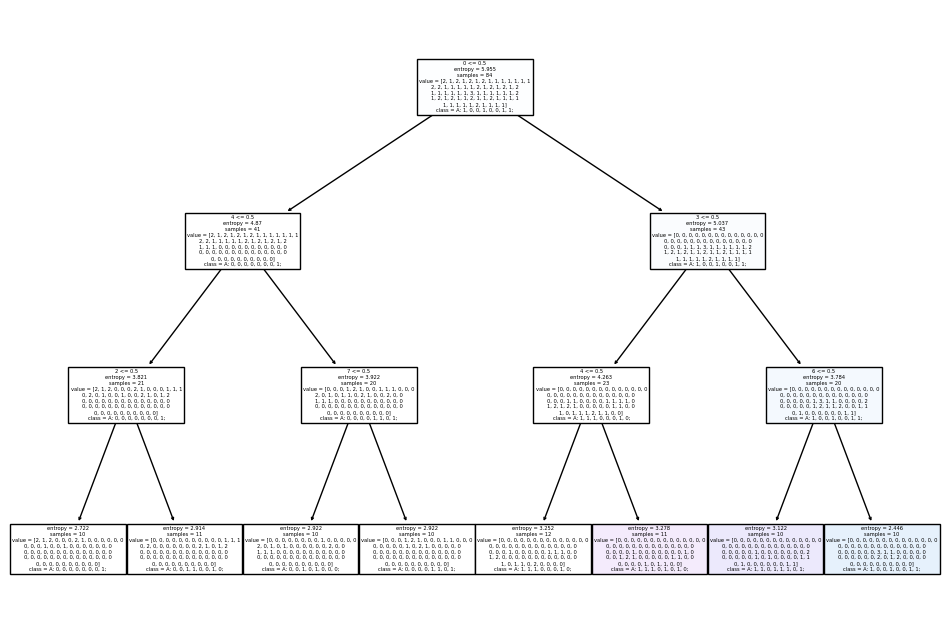

In [67]:
#plot the decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dtree_new, filled=True, feature_names=x_new.columns, class_names=dtree_new.classes_)
plt.show()

In [68]:
#Test for errors, if any, and print them
from sklearn.metrics import accuracy_score

# Assuming `dtree` is your trained model and `X_test` and `y_test` are your test data and labels
predictions_new = dtree_new.predict(x_test)
accuracy = accuracy_score(y_test_new, predictions_new)

# The number of errors is then the number of test instances minus the number of correct predictions
num_errors = len(y_test) - accuracy * len(y_test)
print("Number of errors: {:.0f}/{:d}".format(num_errors, len(y_test_new)))


Number of errors: 33/36


In [69]:
# Predictions using the old model
predictions = dtree.predict(x_test)
accuracy_old = accuracy_score(y_test, predictions)

# Predictions using the new model
predictions_new = dtree_new.predict(x_test_new)
accuracy_new = accuracy_score(y_test_new, predictions_new)

# Print the accuracy scores
print("Old model accuracy: ", accuracy_old)
print("New model accuracy: ", accuracy_new)

Old model accuracy:  0.08333333333333333
New model accuracy:  0.08333333333333333
